In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

base_dir = "../input"
print(os.listdir(base_dir))

['hmnist_28_28_RGB.csv', 'HAM10000_metadata.csv', 'hmnist_28_28_L.csv', 'ham10000_images_part_2', 'hmnist_8_8_RGB.csv', 'ham10000_images_part_1', 'hmnist_8_8_L.csv']
['hmnist_28_28_RGB.csv', 'HAM10000_metadata.csv', 'hmnist_28_28_L.csv', 'ham10000_images_part_2', 'hmnist_8_8_RGB.csv', 'ham10000_images_part_1', 'hmnist_8_8_L.csv']


In [2]:
df = pd.read_csv(os.path.join(base_dir, "HAM10000_metadata.csv"))
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [3]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
lesion_id       10015 non-null object
image_id        10015 non-null object
dx              10015 non-null object
dx_type         10015 non-null object
age             9958 non-null float64
sex             10015 non-null object
localization    10015 non-null object
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [8]:
imageid_path_dict = {
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob(os.path.join(base_dir, '*', '*.jpg'))
}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [9]:
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes

In [10]:
df.sample(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
1027,HAM_0000121,ISIC_0027025,bkl,consensus,70.0,male,trunk,../input/ham10000_images_part_1/ISIC_0027025.jpg,Benign keratosis-like lesions,2
9410,HAM_0003359,ISIC_0032979,nv,consensus,45.0,female,unknown,../input/ham10000_images_part_2/ISIC_0032979.jpg,Melanocytic nevi,4
6973,HAM_0001604,ISIC_0025458,nv,histo,45.0,female,lower extremity,../input/ham10000_images_part_1/ISIC_0025458.jpg,Melanocytic nevi,4
2217,HAM_0004936,ISIC_0025573,mel,histo,80.0,male,chest,../input/ham10000_images_part_1/ISIC_0025573.jpg,dermatofibroma,6
8696,HAM_0005910,ISIC_0027540,nv,histo,60.0,male,back,../input/ham10000_images_part_1/ISIC_0027540.jpg,Melanocytic nevi,4
7140,HAM_0002363,ISIC_0033058,nv,histo,50.0,male,upper extremity,../input/ham10000_images_part_2/ISIC_0033058.jpg,Melanocytic nevi,4
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,../input/ham10000_images_part_1/ISIC_0024310.jpg,dermatofibroma,6
7940,HAM_0002325,ISIC_0033021,nv,histo,45.0,male,abdomen,../input/ham10000_images_part_2/ISIC_0033021.jpg,Melanocytic nevi,4
6339,HAM_0004001,ISIC_0029996,nv,follow_up,60.0,male,lower extremity,../input/ham10000_images_part_2/ISIC_0029996.jpg,Melanocytic nevi,4
9446,HAM_0007333,ISIC_0033614,nv,consensus,40.0,male,unknown,../input/ham10000_images_part_2/ISIC_0033614.jpg,Melanocytic nevi,4


In [18]:
tf = df[df.cell_type_idx == 0].iloc[:100]
for i in range(6):
    temp = df[df.cell_type_idx == (i+1)].iloc[:100]
    tf = tf.append(temp)

In [19]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 9687 to 1310
Data columns (total 10 columns):
lesion_id        700 non-null object
image_id         700 non-null object
dx               700 non-null object
dx_type          700 non-null object
age              700 non-null float64
sex              700 non-null object
localization     700 non-null object
path             700 non-null object
cell_type        700 non-null object
cell_type_idx    700 non-null int8
dtypes: float64(1), int8(1), object(8)
memory usage: 55.4+ KB


In [20]:
tf.sample(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
1210,HAM_0000559,ISIC_0024693,nv,follow_up,45.0,female,upper extremity,../input/ham10000_images_part_1/ISIC_0024693.jpg,Melanocytic nevi,4
2505,HAM_0006800,ISIC_0030778,bcc,histo,85.0,female,face,../input/ham10000_images_part_2/ISIC_0030778.jpg,Basal cell carcinoma,1
1238,HAM_0006453,ISIC_0029081,mel,histo,70.0,male,abdomen,../input/ham10000_images_part_1/ISIC_0029081.jpg,dermatofibroma,6
9783,HAM_0002648,ISIC_0027650,akiec,histo,40.0,male,neck,../input/ham10000_images_part_1/ISIC_0027650.jpg,Actinic keratoses,0
2325,HAM_0005155,ISIC_0025321,vasc,histo,85.0,male,lower extremity,../input/ham10000_images_part_1/ISIC_0025321.jpg,Vascular lesions,5
1112,HAM_0001785,ISIC_0032941,df,histo,50.0,male,upper extremity,../input/ham10000_images_part_2/ISIC_0032941.jpg,Dermatofibroma,3
2523,HAM_0005309,ISIC_0026282,bcc,histo,50.0,male,upper extremity,../input/ham10000_images_part_1/ISIC_0026282.jpg,Basal cell carcinoma,1
2491,HAM_0003805,ISIC_0031527,bcc,histo,80.0,female,scalp,../input/ham10000_images_part_2/ISIC_0031527.jpg,Basal cell carcinoma,1
88,HAM_0005075,ISIC_0030607,bkl,histo,80.0,male,upper extremity,../input/ham10000_images_part_2/ISIC_0030607.jpg,Benign keratosis-like lesions,2
1257,HAM_0004720,ISIC_0027277,mel,histo,40.0,male,lower extremity,../input/ham10000_images_part_1/ISIC_0027277.jpg,dermatofibroma,6


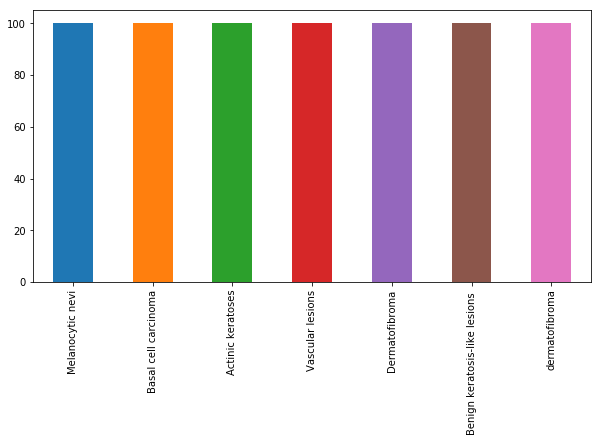

In [21]:
def plot(index):
    fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
    tf[index].value_counts().plot(kind='bar', ax = ax1)
plot('cell_type')

In [31]:
df.to_csv('export.csv', index=False)
exp = pd.read_csv(os.path.join(base_dir, "export.csv"))
exp.head()

FileNotFoundError: File b'../input/export.csv' does not exist